In [20]:
# We import our libs:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [47]:
# Constants input:
a = float(input("Introduce a: "))
b = float(input("Introduce b: "))
N = float(input("Introduce N: "))
m1 = float(input("Introduce mass 1: "))
m2 = float(input("Introduce mass 2: "))
m3 = float(input("Introduce mass 3: "))
G = float(input("Introduce G: "))

# Vectors input:
r = []
v = []
print("Introduce position vector 1:")
r.append(np.array([float(input()) for i in range(3)]))
print("Introduce position vector 2:")
r.append(np.array([float(input()) for i in range(3)]))
print("Introduce position vector 3:")
r.append(np.array([float(input()) for i in range(3)]))
print("Introduce velocity vector 1:")
v.append(np.array([float(input()) for i in range(3)]))
print("Introduce velocity vector 2:")
v.append(np.array([float(input()) for i in range(3)]))
print("Introduce velocity vector 3:")
v.append(np.array([float(input()) for i in range(3)]))

r = np.array(r)
v = np.array(v)

# Set constants:
h = (b - a) / N

# Print constants:
print("a: {}".format(a))
print("b: {}".format(b))
print("N: {}".format(N))
print("h: {}".format(h))

# Print vectors:
for i in range(3):
    print("Position vector r{}: {}".format(i+1, r[i]))
    print("Position vector v{}: {}".format(i+1, v[i]))

Introduce a: 0
Introduce b: 1087763
Introduce N: 1087763
Introduce mass 1: 2
Introduce mass 2: 2
Introduce mass 3: 2
Introduce G: 6.673e-11
Introduce position vector 1:
-1
0
0
Introduce position vector 2:
1
0
0
Introduce position vector 3:
0
0
0
Introduce velocity vector 1:
0
-5.775e-6
0
Introduce velocity vector 2:
0
-5.775e-6
0
Introduce velocity vector 3:
0
0
0
a: 0.0
b: 1087763.0
N: 1087763.0
h: 1.0
Position vector r1: [-1.  0.  0.]
Position vector v1: [  0.00000000e+00  -5.77500000e-06   0.00000000e+00]
Position vector r2: [ 1.  0.  0.]
Position vector v2: [  0.00000000e+00  -5.77500000e-06   0.00000000e+00]
Position vector r3: [ 0.  0.  0.]
Position vector v3: [ 0.  0.  0.]


In [48]:
def f(r1, r2, r3, m2, m3):
    return -G * ((m2 * (r1 - r2) / np.linalg.norm((r1 - r2))**3) + (m3 * (r1 - r3) / np.linalg.norm((r1 - r3))**3))

In [49]:
def Runge_Kutta(f, r, v):
    R1 = [r[0]]
    R2 = [r[1]]
    R3 = [r[2]]
    V1 = [v[0]]
    V2 = [v[1]]
    V3 = [v[2]]
    for i in range(int(N)):
        
        ### r1 vector:
        k1_r1_x = h * V1[i][0]
        k1_r1_y = h * V1[i][1]
        k1_r1_z = h * V1[i][2]

        l1_r1 = h * f(R1[i], R2[i], R3[i], m2, m3)

        k2_r1_x = h * (V1[i][0] + 0.5*l1_r1[0])
        k2_r1_y = h * (V1[i][1] + 0.5*l1_r1[1])
        k2_r1_z = h * (V1[i][2] + 0.5*l1_r1[2])

        l2_r1 = h * f(R1[i] + 0.5*k1_r1_x, R2[i] + 0.5*k1_r1_y, R3[i] + 0.5*k1_r1_z, m2, m3)

        k3_r1_x = h * (V1[i][0] + 0.5*l2_r1[0])
        k3_r1_y = h * (V1[i][1] + 0.5*l2_r1[1])
        k3_r1_z = h * (V1[i][2] + 0.5*l2_r1[2])

        l3_r1 = h * f(R1[i] + 0.5*k2_r1_x, R2[i] + 0.5*k2_r1_y, R3[i] + 0.5*k2_r1_z, m2, m3)

        k4_r1_x = h * (V1[i][0] + l3_r1[0])
        k4_r1_y = h * (V1[i][1] + l3_r1[1])
        k4_r1_z = h * (V1[i][2] + l3_r1[2])

        l4_r1 = h * f(R1[i] + k3_r1_x, R2[i] + k3_r1_y, R3[i] + k3_r1_z, m2, m3)


        ### r2 vector:
        k1_r2_x = h * V2[i][0]
        k1_r2_y = h * V2[i][1]
        k1_r2_z = h * V2[i][2]

        l1_r2 = h * f(R2[i], R1[i], R3[i], m1, m3)

        k2_r2_x = h * (V2[i][0] + 0.5*l1_r2[0])
        k2_r2_y = h * (V2[i][1] + 0.5*l1_r2[1])
        k2_r2_z = h * (V2[i][2] + 0.5*l1_r2[2])

        l2_r2 = h * f(R2[i] + 0.5*k1_r2_y, R1[i] + 0.5*k1_r2_x, R3[i] + 0.5*k1_r2_z, m1, m3)

        k3_r2_x = h * (V2[i][0] + 0.5*l2_r2[0])
        k3_r2_y = h * (V2[i][1] + 0.5*l2_r2[1])
        k3_r2_z = h * (V2[i][2] + 0.5*l2_r2[2])

        l3_r2 = h * f(r[1] + 0.5*k2_r2_y, R1[i] + 0.5*k2_r2_x, R3[i] + 0.5*k2_r2_z, m1, m3)

        k4_r2_x = h * (V2[i][0] + l3_r2[0])
        k4_r2_y = h * (V2[i][1] + l3_r2[1])
        k4_r2_z = h * (V2[i][2] + l3_r2[2])

        l4_r2 = h * f(R2[i] + k3_r2_y, R1[i] + k3_r2_x, R3[i] + k3_r2_z, m1, m3)


        ### r3 vector:
        k1_r3_x = h * V3[i][0]
        k1_r3_y = h * V3[i][1]
        k1_r3_z = h * V3[i][2]

        l1_r3 = h * f(R3[i], R1[i], R2[i], m1, m2)

        k2_r3_x = h * (V3[i][0] + 0.5*l1_r3[0])
        k2_r3_y = h * (V3[i][1] + 0.5*l1_r3[1])
        k2_r3_z = h * (V3[i][2] + 0.5*l1_r3[2])

        l2_r3 = h * f(R3[i] + 0.5*k1_r3_z, R1[i] + 0.5*k1_r3_x, R2[i] + 0.5*k1_r3_y, m1, m2)

        k3_r3_x = h * (V3[i][0] + 0.5*l2_r3[0])
        k3_r3_y = h * (V3[i][1] + 0.5*l2_r3[1])
        k3_r3_z = h * (V3[i][2] + 0.5*l2_r3[2])

        l3_r3 = h * f(r[2] + 0.5*k2_r3_z, R1[i] + 0.5*k2_r3_x, R2[i] + 0.5*k2_r3_y, m1, m2)

        k4_r3_x = h * (V3[i][0] + l3_r3[0])
        k4_r3_y = h * (V3[i][1] + l3_r3[1])
        k4_r3_z = h * (V3[i][2] + l3_r3[2])

        l4_r3 = h * f(R3[i] + k3_r3_z, R1[i] + k3_r3_x, R2[i] + k3_r3_y, m1, m2)

        # Runge-Kutta's step:
        
        # Position:
        x = R1[i][0] + (k1_r1_x + 2*k2_r1_x + 2*k3_r1_x + k4_r1_x)/6.
        y = R1[i][1] + (k1_r1_y + 2*k2_r1_y + 2*k3_r1_y + k4_r1_y)/6.
        z = R1[i][2] + (k1_r1_z + 2*k2_r1_z + 2*k3_r1_z + k4_r1_z)/6.
        if i > 0:
            R1.append(np.array([x, y, z]) + R1[i-1])
        else:
            R1.append(np.array([x, y, z]))
        x = R2[i][0] + (k1_r2_x + 2*k2_r2_x + 2*k3_r2_x + k4_r2_x)/6.
        y = R2[i][1] + (k1_r2_y + 2*k2_r2_y + 2*k3_r2_y + k4_r2_y)/6.
        z = R2[i][2] + (k1_r2_z + 2*k2_r2_z + 2*k3_r2_z + k4_r2_z)/6.
        if i > 0:
            R2.append(np.array([x, y, z]) + R2[i-1])
        else:
            R2.append(np.array([x, y, z]))
        x = R3[i][0] + (k1_r3_x + 2*k2_r3_x + 2*k3_r3_x + k4_r3_x)/6.
        y = R3[i][1] + (k1_r3_y + 2*k2_r3_y + 2*k3_r3_y + k4_r3_y)/6.
        z = R3[i][2] + (k1_r3_z + 2*k2_r3_z + 2*k3_r3_z + k4_r3_z)/6.
        if i > 0:
            R3.append(np.array([x, y, z]) + R3[i-1])
        else:
            R3.append(np.array([x, y, z]))
        
        # Velocity:
        vx = V1[i][0] + (l1_r1[0] + 2*l2_r1[0] + 2*l3_r1[0] + l4_r1[0])/6.
        vy = V1[i][1] + (l1_r1[1] + 2*l2_r1[1] + 2*l3_r1[1] + l4_r1[1])/6.
        vz = V1[i][2] + (l1_r1[2] + 2*l2_r1[2] + 2*l3_r1[2] + l4_r1[2])/6.
        if i > 0:
            V1.append(np.array([x, y, z]) + V1[i-1])
        else:
            V1.append(np.array([x, y, z]))
        vx = V2[i][0] + (l1_r2[0] + 2*l2_r2[0] + 2*l3_r2[0] + l4_r2[0])/6.
        vy = V2[i][1] + (l1_r2[1] + 2*l2_r2[1] + 2*l3_r2[1] + l4_r2[1])/6.
        vz = V2[i][2] + (l1_r2[2] + 2*l2_r2[2] + 2*l3_r2[2] + l4_r2[2])/6.
        if i > 0:
            V2.append(np.array([x, y, z]) + V2[i-1])
        else:
            V2.append(np.array([x, y, z]))
        vx = V3[i][0] + (l1_r3[0] + 2*l2_r3[0] + 2*l3_r3[0] + l4_r3[0])/6.
        vy = V3[i][1] + (l1_r3[1] + 2*l2_r3[1] + 2*l3_r3[1] + l4_r3[1])/6.
        vz = V3[i][2] + (l1_r3[2] + 2*l2_r3[2] + 2*l3_r3[2] + l4_r3[2])/6.
        if i > 0:
            V3.append(np.array([x, y, z]) + V3[i-1])
        else:
            V3.append(np.array([x, y, z]))
    
    R = np.array([np.array(R1), np.array(R2), np.array(R3)])
    V = np.array([np.array(V1), np.array(V2), np.array(V3)])
    return R, V

In [50]:
R, V = Runge_Kutta(f, r, v)

/Users/RodolfoFerro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


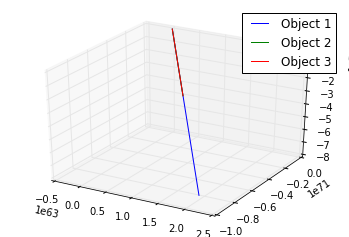

In [51]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(R[0,:,0], R[0,:,1], R[0,:,2], label='Object 1')
ax.plot(R[1,:,0], R[1,:,1], R[1,:,2], label='Object 2')
ax.plot(R[2,:,0], R[2,:,1], R[2,:,2], label='Object 3')
ax.legend()
plt.show()

In [31]:
r1 = open("obj1.txt", "w")
for i in range(len(R[0])):
    r1.write(str(R[0,i,0]) + " " + str(R[0,i,1]) + " " + str(R[0,i,2]) + "\n")
r1.close()
r2 = open("obj2.txt", "w")
for i in range(len(R[1])):
    r2.write(str(R[1,i,0]) + " " + str(R[1,i,1]) + " " + str(R[1,i,2]) + "\n")
r2.close()
r3 = open("obj3.txt", "w")
for i in range(len(R[2])):
    r3.write(str(R[2,i,0]) + " " + str(R[2,i,1]) + " " + str(R[2,i,2]) + "\n")
r3.close()

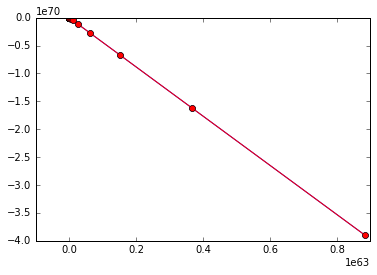

In [56]:
plt.plot(R[0,:,0], R[1,:,1], "-ob")
plt.plot(R[0,:,0], R[1,:,1], "-or")
#plt.plot(R[2,:,0], R[2,:,1], "-og")